# Week 1 Assignment
In this assignment, we will look at computing the product AB
 of two matrices A,B∈Rn×n
. The following code snippet defines a function that computes the product of two matrices. For example, the product of two 10 by 10 matrices is printed. The final line prints matrix1 @ matrix2 - the @ symbol denotes matrix multiplication, and Python will get Numpy to compute the product of two matrices. By looking at the output, it’s possible to check that the two results are identical.

In [1]:
import numpy as np


def slow_matrix_product(mat1, mat2):
    """Multiply two matrices."""
    assert mat1.shape[1] == mat2.shape[0]
    result = []
    for c in range(mat2.shape[1]):
        column = []
        for r in range(mat1.shape[0]):
            value = 0
            for i in range(mat1.shape[1]):
                value += mat1[r, i] * mat2[i, c]
            column.append(value)
        result.append(column)
    return np.array(result).transpose()

## Part 1: a better function
Write your own function called `faster_matrix_product` that computes the product of two matrices more efficiently than `slow_matrix_product`. Your function may use functions from Numpy (eg np.dot) to complete part of its calculation, but your function should not use `np.dot` or `@` to compute the full matrix-matrix product.


In [2]:
def faster_matrix_product(mat1, mat2):
    '''Multiply 2 matrices faster'''
    # Check both matrices are the same shape
    assert mat1.shape == mat2.shape
    # Create empty results array. We expect the result matrix to be the same nxn as the test cases
    result = np.empty(mat1.shape)

    # Loop through the rows
    for indrow, valrow in enumerate(mat1):

        # Loop through elements in rows
        for indel, valel in enumerate(valrow):

            # Use dot product row to find sum of products of elements from mat1 and mat2
            result[indrow,indel] = np.dot(valrow, mat2[:,indel])

    return result

Before you look at the performance of your function, you should check that it is computing the correct results. Write a Python script using an assert statement that checks that your function gives the same result as using `@` for random 2 by 2, 3 by 3, 4 by 4, and 5 by 5 matrices.

In a text box, give two brief reasons (1-2 sentences for each) why your function is better than `slow_matrix_product`. At least one of your reasons should be related to the time you expect the two functions to take.

In [3]:
def matrix_test(matrixfunc):
    '''Testing the new matrix product function by comparing against @/np.matmul'''
    for i in range(10):
        test1 = np.random.rand(i,i)
        test2 = np.random.rand(i,i)
        assert np.allclose(test1 @ test2, matrixfunc(test1, test2))
    print('New function works!')

matrix_test(faster_matrix_product)

New function works!


### Discussion
I expect my function to be faster because it uses one less loop to iterate through the calculation compared to the slow function, and using `np.dot` to calculate the sum of rows and columns.

## Compare speeds
Next, we want to compare the speed of `slow_matrix_product` and `faster_matrix_product`. Write a Python script that runs the two functions for matrices of a range of sizes, and use matplotlib to create a plot showing the time taken for different-sized matrices for both functions. You should be able to run the functions for matrices of size up to around 1000 by 1000 (but if you’re using an older/slower computer, you may decide to decrease the maximums slightly).

In [4]:
from timeit import timeit

matrixsize = np.arange(100,1001,100)
slowtimes = []
fasttimes = []

for i in matrixsize:
    matrix1 = np.random.rand(i, i)
    matrix2 = np.random.rand(i, i)
    # Only done 2 repeats for the slow function becauase it takes ages to run
    slowt = timeit(lambda:slow_matrix_product(matrix1, matrix2), number=2)
    # x5 for fast because it's faster
    fastt = timeit(lambda:faster_matrix_product(matrix1, matrix2), number=5)
    print(i, slowt/2, fastt/5)
    slowtimes.append(slowt/2)
    fasttimes.append(fastt/5)

100 0.3107467500376515 0.013447040016762913
200 2.4557371999835595 0.06347491999622434
300 8.216198850015644 0.14587449999526142
400 20.233149349980522 0.2904098600149155
500 39.71840189996874 0.4963621200062335
600 68.33049620001111 0.7733295599929988
700 110.44012004998513 1.1536156399874016
800 167.68750405003084 1.5866576400119812
900 240.7185632000328 2.3213875599903986
1000 331.1437254999764 2.992362739983946


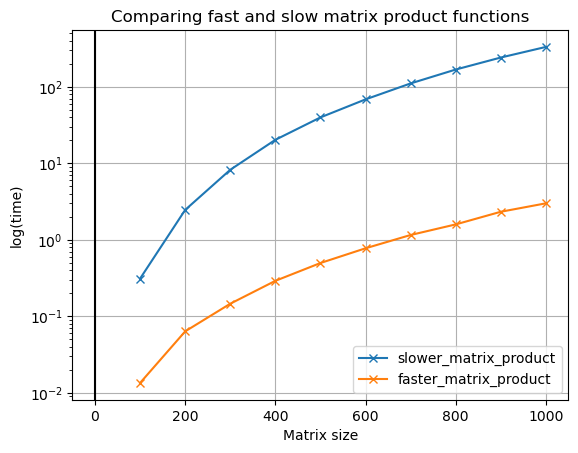

In [5]:
import matplotlib.pyplot as plt

def axplot():
    '''Adds some axes, labels etc.'''
    plt.xlabel('Matrix size')
    plt.ylabel('log(time)')
    plt.axvline(x=0, c='k')
    plt.grid('show')
    plt.legend()

plt.plot(matrixsize, slowtimes, marker='x', label='slower_matrix_product')
plt.plot(matrixsize, fasttimes, marker='x', label='faster_matrix_product')
plt.yscale('log')
plt.title('Comparing fast and slow matrix product functions')
axplot()

### Discussion
The slow function needs to iterate through each element of each matrix to calculate the sum of each column and row, where instead my faster function only needs to iterate through each element of the first matrix and uses the `np.dot` function to calculate the sum of each row. This will cut down processing time and is evident in the plot, as both functions have an exponential dependence on matrix size, but the faster function is nearly 2 orders of magnitude faster.

## Part 2: speeding it up with Numba
Create a copy of your function `faster_matrix_product` that is just-in-time (JIT) compiled using Numba. To demonstrate the speed improvement acheived by using Numba, make a plot (similar to that you made in the first part) that shows the times taken to multiply matrices using `faster_matrix_product`, `faster_matrix_product` with Numba JIT compilation and Numpy (@).

In [6]:
import numba
from numba import jit

# We call jit just before defining the function

@jit(nopython=True)
def faster_matrix_product_numba(mat1, mat2):
    '''This function is exploting pre-compiling thanks to jit'''
    #required this extra line as numba likes using np.dot on array with float entries
    mat1 = mat1.astype(np.float64)
    mat2 = mat2.astype(np.float64)
    # Check matrices the same shape
    assert mat1.shape == mat2.shape
    # Create empty results array. We expect the result matrix to be the same nxn as the test cases
    result = np.empty(mat1.shape)

    # Loop through the rows
    for indrow, valrow in enumerate(mat1):

        # Loop through elements in rows
        for indel, valel in enumerate(valrow):

            # Use dot product row in mat1 and column in mat2
            result[indrow,indel] = np.dot(valrow, mat2[:,indel])

    return result

matrix_test(faster_matrix_product_numba)

New function works!


C:\Users\jaydi\AppData\Local\Temp\ipykernel_42416\4176271743.py:24: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 1, 'A', False, aligned=True), Array(float64, 1, 'A', False, aligned=True))
  result[indrow,indel] = np.dot(valrow, mat2[:,indel])


In [7]:
import matplotlib.pyplot as plt
from timeit import timeit
myfast = []
jitfast = []
at = []

# Iterates through matrices sized from 100 through to 1000
for i in matrixsize:
    matrix1 = np.random.rand(i, i)
    matrix2 = np.random.rand(i, i)
    
    myfastt = timeit(lambda:faster_matrix_product(matrix1, matrix2), number=5)
    jitfastt = timeit(lambda:faster_matrix_product_numba(matrix1, matrix2), number=5)
    att = timeit(lambda:matrix1 @ matrix2, number=5)

    print(i, myfastt/5, jitfastt/5, att/5)

    myfast.append(myfastt/5)
    jitfast.append(jitfastt/5)
    at.append(att/5)

100 0.01569817999843508 0.0023534199921414257 0.003341139992699027
200 0.07056269999593497 0.01296857998240739 0.0012993999989703298
300 0.16328110001049936 0.03409269999247044 0.00039785997942090037
400 0.40996439999435097 0.11103829999919981 0.0053702599834650755
500 0.582685159984976 0.17861496000550686 0.0029500599950551985
600 0.8439672000007704 0.3719308600062504 0.005222079996019602
700 1.3276267800014465 0.6144476199988276 0.008777460013516248
800 1.8828551199985668 0.9279127399902791 0.009531939984299242
900 2.2727015800075607 1.234504839987494 0.01593392000067979
1000 2.9440898600034417 1.6929165600100533 0.02396003999747336


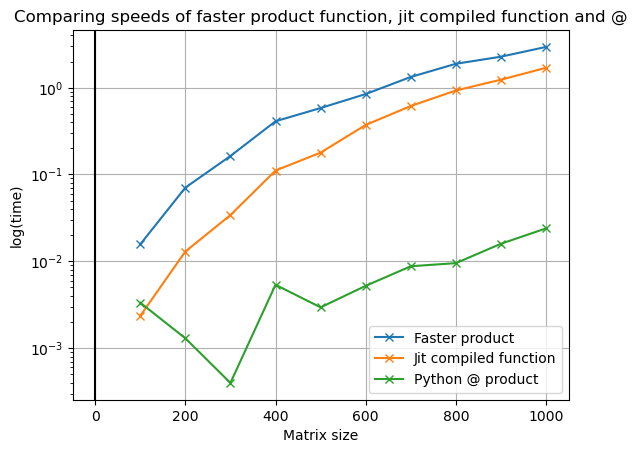

In [8]:
plt.plot(matrixsize, myfast, marker='x', label='Faster product')
plt.plot(matrixsize, jitfast, marker='x', label='Jit compiled function')
plt.plot(matrixsize, at, marker='x', label='Python @ product')
plt.yscale('log')
plt.title('Comparing speeds of faster product function, jit compiled function and @')
axplot()

### Discussion
We can clearly see from the plot that the `jit` compiled function is nearly a whole order of magnitude faster and the built-in `@` method is over 2 orders faster than the regular one. Jit compiling is faster because it compiles code into low-level machine code which is faster for a computer to interpret. The `@` is fast because it is highly optimised within the Python environment and `np.linalg` functions rely on BLAS and LAPACK to provide low level versions of linear algebra algorithms.

## Matrix ordering
Make a plot that compares the times taken by your JIT compiled function when the inputs have different combinations of C-style and Fortran-style ordering (ie the plot should have lines for when both inputs are C-style, when the first is C-style and the second is Fortran-style, and so on). 

In [9]:
cjitt = []

cc = []
cf = []
fc = []
ff = []
at=[]

matrixsizemore = np.arange(100,1001,50)


for i in matrixsizemore:
    matrix1 = np.random.rand(i, i)
    matrix2 = np.random.rand(i, i)
    matrix1fort = np.asfortranarray(matrix1)
    matrix2fort = np.asfortranarray(matrix2)

    cct = timeit(lambda:faster_matrix_product_numba(matrix1, matrix2), number=5)
    cft = timeit(lambda:faster_matrix_product_numba(matrix1, matrix2fort), number=5)
    fct = timeit(lambda:faster_matrix_product_numba(matrix1fort, matrix2), number=5)
    fft =  timeit(lambda:faster_matrix_product_numba(matrix1fort, matrix2fort), number=5)
    att = timeit(lambda:matrix1fort@matrix2fort, number=5)

    cc.append(cct/5)
    cf.append(cft/5)
    fc.append(fct/5)
    ff.append(fft/5)
    at.append(att/5)

C:\Users\jaydi\AppData\Local\Temp\ipykernel_42416\4176271743.py:24: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 1, 'A', False, aligned=True), Array(float64, 1, 'F', False, aligned=True))
  result[indrow,indel] = np.dot(valrow, mat2[:,indel])


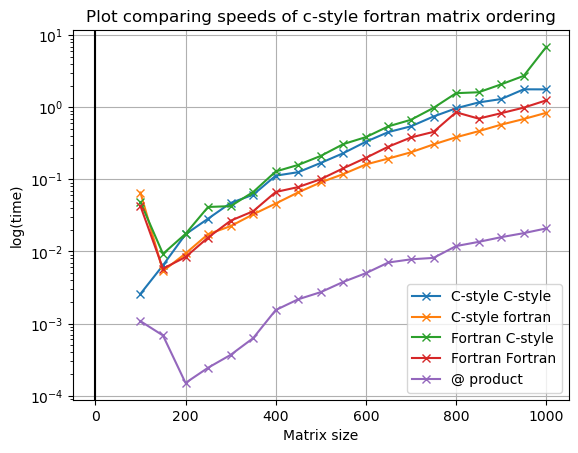

In [10]:
plt.plot(matrixsizemore, cc, marker='x', label='C-style C-style')
plt.plot(matrixsizemore, cf, marker='x', label='C-style fortran')
plt.plot(matrixsizemore, fc, marker='x', label='Fortran C-style')
plt.plot(matrixsizemore, ff, marker='x', label='Fortran Fortran')
plt.plot(matrixsizemore, at, marker='x', label='@ product')
plt.yscale('log')
plt.title('Plot comparing speeds of c-style fortran matrix ordering')
axplot()

## Discussion
C-style -> Fortran ordering is the best performing matrix product, beaten only by the built-in `@` matrix product in Python. This is becase C-style ordering saves arrays row by row in the memory address, and this is advantageous for the JIT compiled function as this makes it easy to access the next element in the array. The Fortran ordering saves arrays in columns which is good for the second matrix, because we are reading down the matrix columns, making elements easy to read as they are next to each other. I assume the initial bump in processing time is due to the initial compilation

### Memory address layout
![alternatvie text](https://www.smcm.iqfr.csic.es/docs/intel/mkl/mkl_userguide/Images/Row-major-vs-Column-major_3.jpg)